<a href="https://colab.research.google.com/github/spingram/MAT421-sam/blob/main/Euler'sMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The logistics equation is a simple differential equation model that can be used to relate the change in population dP/dt
 to the current population, P
, given a growth rate, r
, and a carrying capacity, K
. The logistics equation can be expressed by:

dP/dt=rP(1−PK)

Write a function my_logistics_eq(t,P,r,K)
 that represents the logistics equation with a return of [dP,P_t] where P_t is the population at time t
. Note that this format allows my_logistics_eq
 to be used as an input argument to solve_ivp. You may assume that the arguments dP
, t
, P
, r
, and K
 are all scalars, and dP
 is the value dPdt
 given r
, P
, and K
. Note that the input argument, t
, is obligatory if my_logistics_eq
 is to be used as an input argument to solve_ivp, even though it is part of the differential equation. Use Eulers method with a step size of .01

In [87]:
import numpy as np

def my_logistics_eq(t, P, r, K):
    if t < 0.01:
      steps = [0]
    else:
      steps = np.linspace(0, t, int(t * 100))

    P_t = np.zeros(len(steps)+1)
    Dp = np.zeros(len(steps)+1)
    P_t[0] = P
    Dp[0]=0
    for i in range(0,len(steps)):
        P_t[i + 1] = P_t[i] + ((r * P_t[i]) * (1 - (P_t[i] / K)))*.01
        Dp[i+1] = (r * P_t[i]) * (1 - (P_t[i] / K))

    Dp_f = Dp[-1]
    P_t_f = P_t[-1]
    return [Dp_f, P_t_f]



In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from functools import partial
plt.style.use('seaborn-poster')

%matplotlib inline

<ipython-input-11-79360273bda1>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [88]:
dP = my_logistics_eq(0, 10, 1.1, 15)
dP

[3.666666666666667, 10.036666666666667]

Modify the test code in the book to create the graph of the differential equation without the solver function.

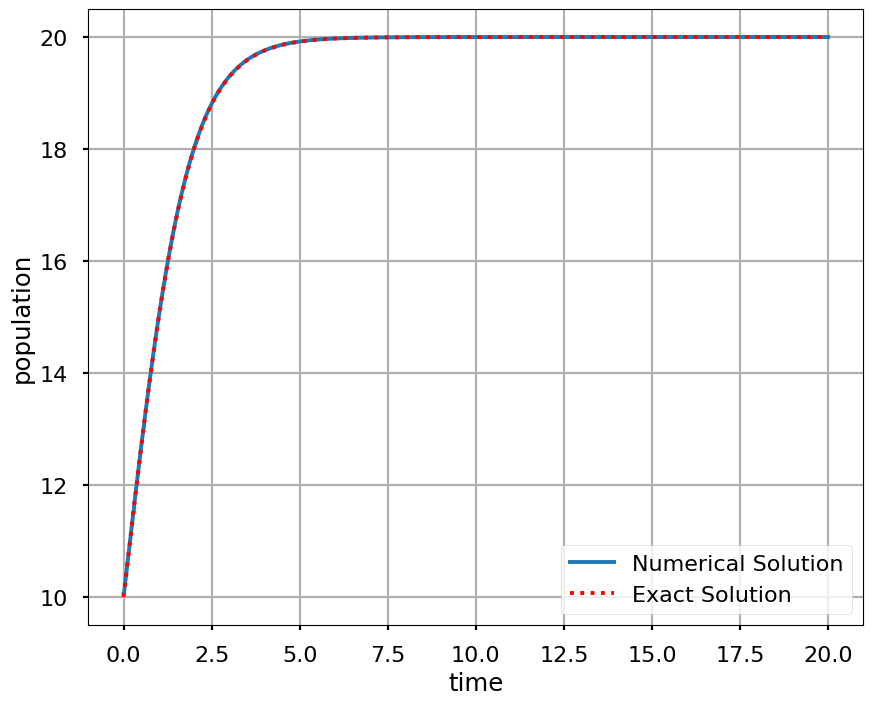

In [91]:
from functools import partial

t0 = 0
tf = 20
P0 = 10
r = 1.1
K = 20
t = np.linspace(0, 20, 2001)
#Modified Section
sol_y = np.zeros(len(t))
for i in range(0,len(t)):
  vals= my_logistics_eq(t[i],P0,r,K)
  sol_y[i]=vals[1]

plt.figure(figsize = (10, 8))
plt.plot(t, sol_y)
plt.plot(t, \
  K*P0*np.exp(r*t)/(K+P0*(np.exp(r*t)-1)),'r:')
plt.xlabel('time')
plt.ylabel('population')

plt.legend(['Numerical Solution', \
            'Exact Solution'])
plt.grid(True)
plt.show()

Write a function my_forward_euler(ds,t_span,s0)
, where ds is a function object, f(t,s)
, describing a first-order differential equation, t_span
 is an array of times for which numerical solutions of the differential equation are desired, and s0 is the initial condition of the system. Assume that the size of the state is one. The output argument should be a list of [t, s], such that t[i]=t_span[i]
 for all i
, and s
 should be the integrated values of ds at times t. You should perform the integration using the Forward Euler method, s[ti]=s[ti−1]+(ti−ti−1)ds(ti−1,s[ti−1])
. Note: s[0]
 should equal s0
.

In [94]:
def my_forward_euler(ds, t_span, s0):
    # put your code here
    t=t_span
    s = np.zeros(len(t))
    s[0]=s0
    for i in range(1,len(t)):
      s[i] = s[i-1] + (t[i]-t[i-1])*ds(t[i-1],s[i-1])
    return [t, s]

t_span = np.linspace(0, 1, 10)
s0 = 1

# Define parameters
f = lambda t, s: t*np.exp(-s)

t_eul, s_eul = my_forward_euler(f, t_span, s0)

print(t_eul)
print(s_eul)


[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[1.         1.         1.00454172 1.013584   1.02702534 1.04470783
 1.06642355 1.09192262 1.12092255 1.153118  ]


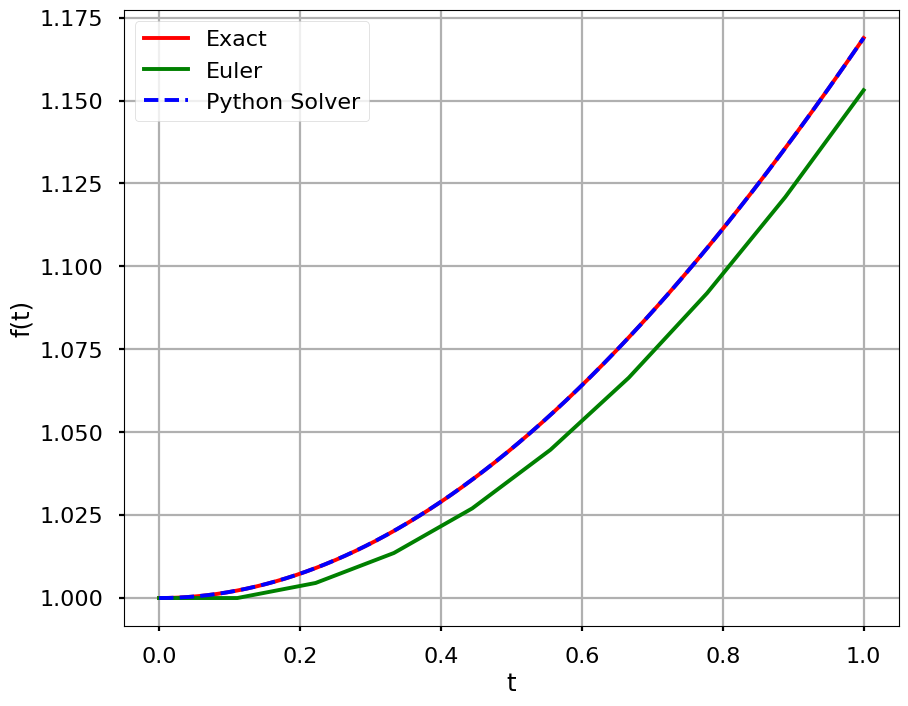

In [95]:
plt.figure(figsize = (10, 8))

# Exact solution
t = np.linspace(0, 1, 1000)
s = np.log(np.exp(s0) + (t**2-t[0])/2)
plt.plot(t, s, 'r', label='Exact')

# Forward Euler
plt.plot(t_eul, s_eul, 'g', label='Euler')

# Python solver
sol = solve_ivp(f, [0, 1], [s0], t_eval=t)
plt.plot(sol.t, sol.y[0], 'b--', \
         label='Python Solver')

plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc=2)
plt.show()